<a href="https://www.kaggle.com/code/ibrahimnibrahim/crop-recommendation-f-0-98-using-50-of-data?scriptVersionId=244218367" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv


In [2]:
df=pd.read_csv('/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('label',axis=1)
y = df['label']  
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123)

# Standard Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

 
models = {
    'Random Forest': RandomForestClassifier(),
    'XGB Classifier':XGBClassifier(),
}

Random Forest Accuracy: 0.9918
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        58
           2       1.00      1.00      1.00        49
           3       1.00      1.00      1.00        49
           4       1.00      1.00      1.00        42
           5       1.00      1.00      1.00        48
           6       1.00      1.00      1.00        50
           7       1.00      1.00      1.00        48
           8       0.87      1.00      0.93        55
           9       1.00      1.00      1.00        49
          10       1.00      1.00      1.00        50
          11       1.00      1.00      1.00        52
          12       1.00      0.98      0.99        47
          13       1.00      1.00      1.00        50
          14       1.00      1.00      1.00        55
          15       1.00      1.00      1.00        47
          16       1.00      1.00      1.00       

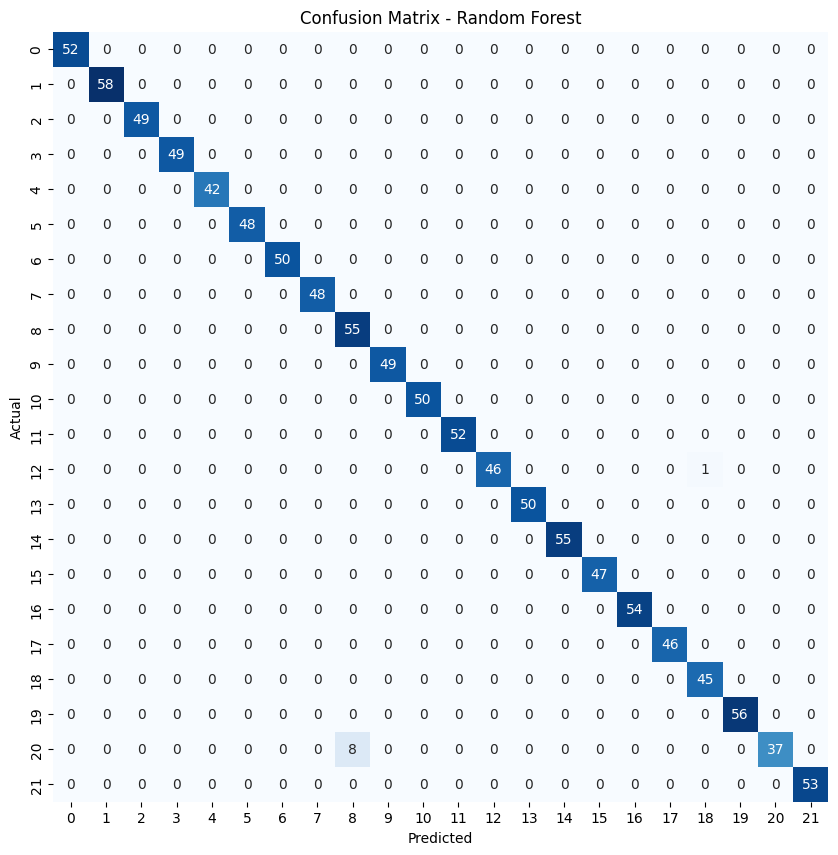

------------------------------------------------------------
XGB Classifier Accuracy: 0.9809
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        58
           2       0.98      1.00      0.99        49
           3       1.00      0.98      0.99        49
           4       0.93      1.00      0.97        42
           5       0.94      0.94      0.94        48
           6       1.00      1.00      1.00        50
           7       1.00      1.00      1.00        48
           8       0.86      0.91      0.88        55
           9       0.98      1.00      0.99        49
          10       1.00      0.94      0.97        50
          11       0.98      1.00      0.99        52
          12       1.00      1.00      1.00        47
          13       0.96      1.00      0.98        50
          14       0.98      1.00      0.99        55
          15       1.00      1.00      1.0

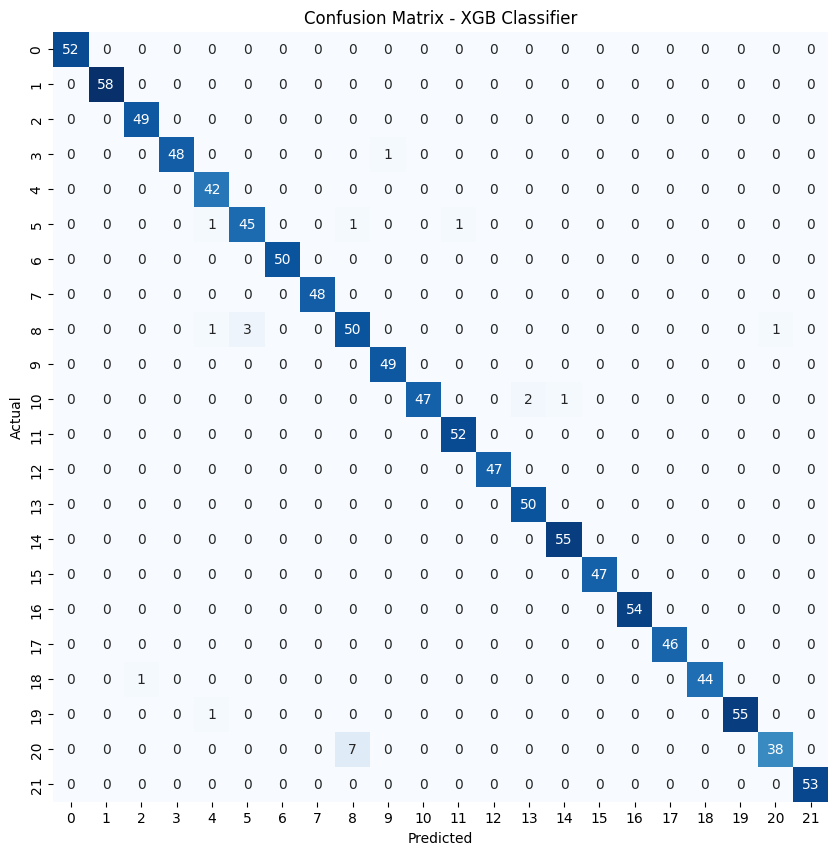

------------------------------------------------------------


In [6]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train and Evaluate Models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    
    # Generate Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot Confusion Matrix
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    print("-" * 60)